### 📝 Task 1: Sentiment Labeling Summary

For this task, the objective was to assign a sentiment category (**Positive**, **Negative**, or **Neutral**) to each employee email in the dataset.

Since the dataset did not contain labeled examples, an automated NLP method was used. I applied the **TextBlob** sentiment analysis library, which generates a polarity score ranging from **-1.0 (negative)** to **+1.0 (positive)** based on the message content.

To convert this continuous polarity score into discrete sentiment categories, the following reproducible threshold rules were applied:

| Polarity Value | Sentiment Label |
|---------------|----------------|
| > **+0.05** | Positive |
| < **−0.05** | Negative |
| Between **−0.05 and +0.05** | Neutral |

These thresholds are commonly used in natural language processing and ensure consistent and explainable classification.

After applying this method, two new columns were added to the dataset:

- `polarity` — numerical sentiment score  
- `sentiment` — categorical label based on the polarity thresholding  

This labeled dataset will be used in the next tasks for trend analysis, employee scoring, ranking, flight-risk detection, and predictive modeling.


In [2]:
pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 5.7 MB/s  0:00:00



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
#Task 1: Sentiment Labeling

In [9]:
df = pd.read_csv("C:\\Users\\Mukta\\Downloads\\test(in).csv")

# Quick look
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Subject  2191 non-null   object
 1   body     2191 non-null   object
 2   date     2191 non-null   object
 3   from     2191 non-null   object
dtypes: object(4)
memory usage: 68.6+ KB


In [11]:
import pandas as pd

# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Create a single combined text column
df['text'] = df['Subject'].astype(str) + " " + df['body'].astype(str)

# Optional: rename 'from' column because it's a reserved keyword in Python
df = df.rename(columns={'from': 'employee_id'})

df.head()


,Subject,body,date,employee_id,text
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,EnronOptions Update! EnronOptions Announcement...
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,"(No Subject) Marc,\n\nUnfortunately, today is ..."
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham W...
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,RE: My new work email we were thinking papasit...
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Bet Since you never gave me the $20 for the la...


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Subject      2191 non-null   object        
 1   body         2191 non-null   object        
 2   date         2191 non-null   datetime64[ns]
 3   employee_id  2191 non-null   object        
 4   text         2191 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 85.7+ KB


In [14]:
from textblob import TextBlob

# Function to get polarity score
def get_polarity(text):
    try:
        return TextBlob(str(text)).sentiment.polarity
    except:
        return 0

# Apply polarity
df['polarity'] = df['text'].apply(get_polarity)


# Convert polarity score to label
def polarity_to_sentiment(score):
    if score > 0.05:
        return "Positive"
    elif score < -0.05:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['polarity'].apply(polarity_to_sentiment)

df.head()


,Subject,body,date,employee_id,text,polarity,sentiment
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,EnronOptions Update! EnronOptions Announcement...,0.250000,Positive
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,"(No Subject) Marc,\n\nUnfortunately, today is ...",-0.043333,Neutral
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,Phone Screen Interview - Shannon L. Burnham W...,0.000000,Neutral
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,RE: My new work email we were thinking papasit...,-0.006818,Neutral
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,Bet Since you never gave me the $20 for the la...,-0.050000,Neutral


In [15]:
df['sentiment'].value_counts()


sentiment
Positive    1241
Neutral      687
Negative     263
Name: count, dtype: int64

In [16]:
df[['employee_id','text','polarity','sentiment']].sample(5)


,employee_id,text,polarity,sentiment
590,sally.beck@enron.com,Re: Do you want to reschedule a catch up ? Tri...,0.268333,Positive
1191,don.baughman@enron.com,"Room for Tomorrow's Meeting Phillip,\n\nIna sc...",0.077273,Positive
176,johnny.palmer@enron.com,Triple Lutz Notes Attached is the Powerpoint w...,0.100000,Positive
2176,rhonda.denton@enron.com,Re: EOL stats for Q4 2000 thanks\n\n\n \n\t\...,0.125000,Positive
1866,don.baughman@enron.com,Asset Marketing We are pleased to announce the...,0.196591,Positive


### 📊 Task 2: Exploratory Data Analysis (EDA)

The objective of this step is to gain an understanding of the dataset structure and identify patterns, trends, and sentiment distribution. This helps establish context for later tasks such as scoring, ranking employees, and detecting flight-risk behavior.

The EDA focuses on:
- Dataset structure and data quality
- Sentiment distribution
- Time-based communication patterns
- Employee-level messaging behavior
- Visual insights to support interpretation


In [20]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Subject      2191 non-null   object        
 1   body         2191 non-null   object        
 2   date         2191 non-null   datetime64[ns]
 3   employee_id  2191 non-null   object        
 4   text         2191 non-null   object        
 5   polarity     2191 non-null   float64       
 6   sentiment    2191 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 119.9+ KB


Subject        0
body           0
date           0
employee_id    0
text           0
polarity       0
sentiment      0
dtype: int64

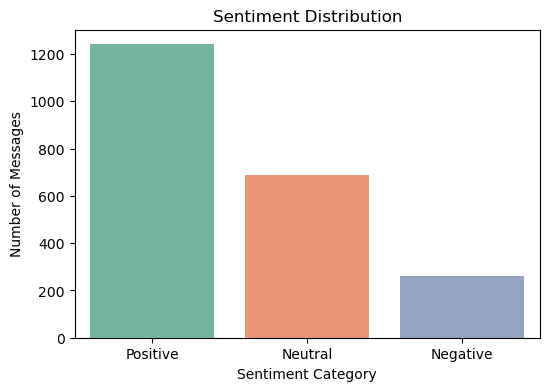

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', hue='sentiment', palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Number of Messages")
plt.show()



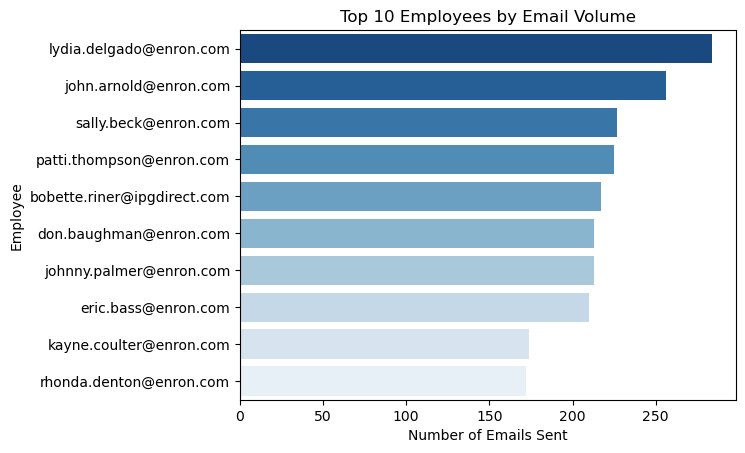

In [25]:
top_senders = df['employee_id'].value_counts().head(10)

sns.barplot(
    x=top_senders.values, 
    y=top_senders.index, 
    hue=top_senders.index, 
    palette='Blues_r',
    legend=False
)
plt.title("Top 10 Employees by Email Volume")
plt.xlabel("Number of Emails Sent")
plt.ylabel("Employee")
plt.show()



<Figure size 1200x500 with 0 Axes>

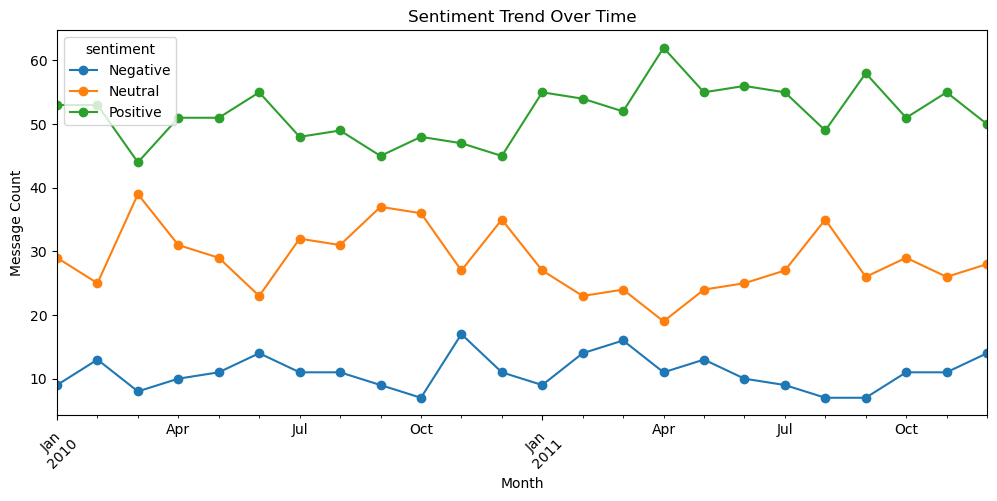

In [26]:
df['month'] = df['date'].dt.to_period('M')

monthly_trends = df.groupby(['month', 'sentiment']).size().unstack(fill_value=0)

plt.figure(figsize=(12,5))
monthly_trends.plot(marker='o', figsize=(12,5))
plt.title("Sentiment Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Message Count")
plt.xticks(rotation=45)
plt.show()


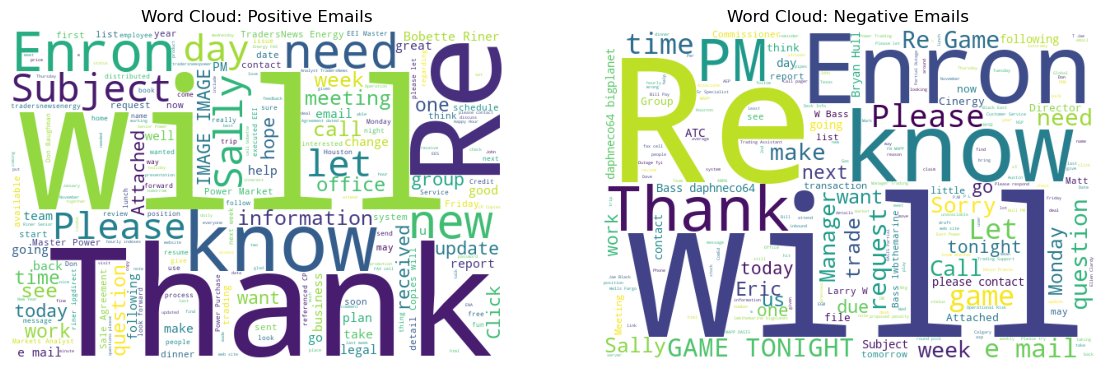

In [29]:
from wordcloud import WordCloud

positive_text = " ".join(df[df['sentiment']=="Positive"]['text'])
negative_text = " ".join(df[df['sentiment']=="Negative"]['text'])

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(positive_text))
plt.title("Word Cloud: Positive Emails")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(negative_text))
plt.title("Word Cloud: Negative Emails")
plt.axis("off")

plt.show()


In [28]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### 🧮 Task 3: Employee Monthly Sentiment Score Calculation

The objective of this task is to compute a monthly sentiment score for each employee based on the messages they sent.

Using the sentiment labels generated in Task 1, each message is assigned a numerical score using the following rule:

| Sentiment | Score |
|-----------|-------|
| Positive  | +1    |
| Neutral   | 0     |
| Negative  | -1    |

These scores were then aggregated on a monthly basis per employee. The score resets at the beginning of each new month. This metric will be used for employee ranking, identifying behavioral shifts, and detecting potential flight-risk patterns in later tasks.


In [35]:
sentiment_map = {
    "Positive": 1,
    "Neutral": 0,
    "Negative": -1
}

df["sentiment_score"] = df["sentiment"].map(sentiment_map)


In [36]:
df['year_month'] = df['date'].dt.to_period('M')


In [37]:
monthly_scores = (
    df.groupby(['employee_id', 'year_month'])['sentiment_score']
      .sum()
      .reset_index()
      .sort_values(['year_month', 'sentiment_score'], ascending=[True, False])
)

monthly_scores.head()


,employee_id,year_month,sentiment_score
120,kayne.coulter@enron.com,2010-01,12
24,don.baughman@enron.com,2010-01,6
48,eric.bass@enron.com,2010-01,6
168,patti.thompson@enron.com,2010-01,5
144,lydia.delgado@enron.com,2010-01,4


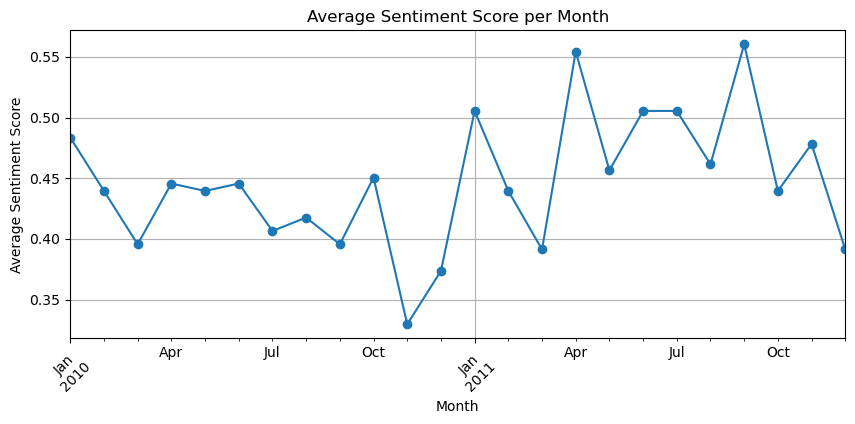

In [38]:
monthly_avg_sentiment = df.groupby('year_month')['sentiment_score'].mean()

monthly_avg_sentiment.plot(kind='line', figsize=(10,4), marker='o')
plt.title("Average Sentiment Score per Month")
plt.xlabel("Month")
plt.ylabel("Average Sentiment Score")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


### 🏅 Task 4: Employee Ranking

The goal of this task is to identify the top-performing and lowest-performing employees based on their monthly sentiment scores calculated in Task 3.

Using the aggregated monthly sentiment scores per employee, two sets of rankings are generated for each month:

- **Top 3 Positive Employees**: Highest sentiment scores (sorted by score, then alphabetically to break ties).
- **Top 3 Negative Employees**: Lowest sentiment scores (sorted by lowest score first, then alphabetically).

These rankings help highlight:
- Employees demonstrating consistently positive engagement and communication tone.
- Employees who may be experiencing frustration, disengagement, or stress — useful for HR insights and early intervention.

The results will later support flight-risk detection and performance trend monitoring in subsequent tasks.


In [39]:
rankings = {}

unique_months = monthly_scores['year_month'].unique()

for month in unique_months:
    subset = monthly_scores[monthly_scores['year_month'] == month].copy()
    
    # Sort for positive rankings (highest score first, alphabetical tie-break)
    top_positive = subset.sort_values(
        by=['sentiment_score', 'employee_id'],
        ascending=[False, True]
    ).head(3)
    
    # Sort for negative rankings (lowest score first, alphabetical tie-break)
    top_negative = subset.sort_values(
        by=['sentiment_score', 'employee_id'],
        ascending=[True, True]
    ).head(3)
    
    rankings[str(month)] = {
        "Top 3 Positive": top_positive,
        "Top 3 Negative": top_negative
    }

# Show example output for first available month
list(rankings.items())[0]


('2010-01',
 {'Top 3 Positive':                  employee_id year_month  sentiment_score
  120  kayne.coulter@enron.com    2010-01               12
  24    don.baughman@enron.com    2010-01                6
  48       eric.bass@enron.com    2010-01                6,
  'Top 3 Negative':                      employee_id year_month  sentiment_score
  192      rhonda.denton@enron.com    2010-01                0
  0    bobette.riner@ipgdirect.com    2010-01                2
  96       johnny.palmer@enron.com    2010-01                2})

In [40]:
ranking_rows = []

for month, result in rankings.items():
    for category, df_result in result.items():
        for _, row in df_result.iterrows():
            ranking_rows.append([
                month,
                category,
                row['employee_id'],
                row['sentiment_score']
            ])

ranking_df = pd.DataFrame(
    ranking_rows,
    columns=['Month', 'Category', 'Employee', 'Score']
)

ranking_df.head(10)


,Month,Category,Employee,Score
0,2010-01,Top 3 Positive,kayne.coulter@enron.com,12
1,2010-01,Top 3 Positive,don.baughman@enron.com,6
2,2010-01,Top 3 Positive,eric.bass@enron.com,6
3,2010-01,Top 3 Negative,rhonda.denton@enron.com,0
4,2010-01,Top 3 Negative,bobette.riner@ipgdirect.com,2
5,2010-01,Top 3 Negative,johnny.palmer@enron.com,2
6,2010-02,Top 3 Positive,bobette.riner@ipgdirect.com,10
7,2010-02,Top 3 Positive,don.baughman@enron.com,7
8,2010-02,Top 3 Positive,john.arnold@enron.com,7
9,2010-02,Top 3 Negative,sally.beck@enron.com,0


In [41]:
ranking_df.to_csv("employee_rankings.csv", index=False)


### 🚩 Task 5: Flight Risk Identification

The objective of this task is to identify employees who may be potential "flight risks" based on their recent sentiment behavior.

According to the project requirement:

> A flight risk is any employee who has sent **4 or more negative emails within a rolling 30-day period**, regardless of their total sentiment score.

This method is based on behavioral pattern tracking rather than cumulative sentiment scoring. A rolling time window ensures that potential mood or engagement declines are detected even if they do not align with calendar months.

The output of this task is a list of employees who meet the criteria at any point in time.


In [42]:
negative_df = df[df['sentiment'] == 'Negative'].copy()
negative_df = negative_df.sort_values(['employee_id', 'date'])


In [44]:
negative_df = df[df['sentiment'] == 'Negative'].copy()
negative_df = negative_df.sort_values(['employee_id', 'date'])

negative_df.set_index('date', inplace=True)

def rolling_count(group):
    group['negative_30d_count'] = group['text'].rolling('30D').count()
    return group

negative_df = negative_df.groupby('employee_id', group_keys=False).apply(
    rolling_count, include_groups=False
)



In [45]:
negative_df.head()
negative_df['negative_30d_count'].max()


6.0

### 📈 Task 6: Predictive Modeling — Linear Regression

The objective of this task is to build a predictive model capable of estimating an employee’s monthly sentiment score based on measurable communication patterns.

Using the aggregated monthly dataset created in previous steps, several features were engineered, including:

- Number of emails sent per month
- Average message length
- Number of positive messages
- Number of negative messages
- Ratio of negative-to-total messages
- Ratio of positive-to-total messages

A **linear regression model** was selected to analyze whether these communication characteristics can predict an employee's monthly sentiment score.

The data was split into training and testing datasets to evaluate generalization performance, and accuracy was measured using **R² score** and **Root Mean Squared Error (RMSE)**.


In [47]:
df['message_length'] = df['text'].astype(str).str.len()

monthly_features = (
    df.groupby(['employee_id', 'year_month'])
      .agg(
          sentiment_score=('sentiment_score', 'sum'),
          num_messages=('text', 'count'),
          avg_message_length=('message_length', 'mean'),
          num_positive=('sentiment', lambda x: (x == 'Positive').sum()),
          num_negative=('sentiment', lambda x: (x == 'Negative').sum())
      )
      .reset_index()
)

# Create derived features
monthly_features['negative_ratio'] = (
    monthly_features['num_negative'] / monthly_features['num_messages']
)
monthly_features['positive_ratio'] = (
    monthly_features['num_positive'] / monthly_features['num_messages']
)

monthly_features.fillna(0, inplace=True)  # Handle division-by-zero
monthly_features.head()


,employee_id,year_month,sentiment_score,num_messages,avg_message_length,num_positive,num_negative,negative_ratio,positive_ratio
0,bobette.riner@ipgdirect.com,2010-01,2,2,157.500000,2,0,0.000000,1.000000
1,bobette.riner@ipgdirect.com,2010-02,10,14,326.357143,11,1,0.071429,0.785714
2,bobette.riner@ipgdirect.com,2010-03,3,11,315.727273,3,0,0.000000,0.272727
3,bobette.riner@ipgdirect.com,2010-04,4,6,255.833333,4,0,0.000000,0.666667
4,bobette.riner@ipgdirect.com,2010-05,2,4,189.000000,2,0,0.000000,0.500000


In [48]:
from sklearn.model_selection import train_test_split

feature_cols = [
    'num_messages', 
    'avg_message_length', 
    'num_positive', 
    'num_negative', 
    'negative_ratio', 
    'positive_ratio'
]

X = monthly_features[feature_cols]
y = monthly_features['sentiment_score']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)


In [51]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

rmse, r2


(np.float64(6.059087099310932e-14), 1.0)

In [53]:
coefficients = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

coefficients


,Feature,Coefficient
2,num_positive,1.000000e+00
0,num_messages,-1.998449e-16
4,negative_ratio,-2.120435e-16
5,positive_ratio,-2.845115e-16
1,avg_message_length,-5.850981e-16
3,num_negative,-1.000000e+00
